In [22]:
import numpy as np

## np.sort和np.argsort

In [3]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [5]:
x.sort()
print(x)

[1 2 3 4 5]


np.argsort返回排好序的<font color=#FF7F50>**索引值**</font>

In [9]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [10]:
x[i]

array([1, 2, 3, 4, 5])

#### 沿着行或列排序

In [11]:
np.random.RandomState(42)
X = np.random.randint(0, 10, (4, 6))
print(X)

[[9 8 8 2 6 9]
 [1 7 1 2 2 8]
 [9 3 6 5 9 1]
 [2 2 8 5 8 9]]


In [14]:
np.sort(X, axis=0) # 对每列排序

array([[1, 2, 1, 2, 2, 1],
       [2, 3, 6, 2, 6, 8],
       [9, 7, 8, 5, 8, 9],
       [9, 8, 8, 5, 9, 9]])

#### 部分排序：分隔

In [ ]:
np.partition(X, K) - 对X进行分割,左边区间是第K小的值，右边区间是其他值，在这两个区间里元素无序

In [16]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [17]:
X

array([[9, 8, 8, 2, 6, 9],
       [1, 7, 1, 2, 2, 8],
       [9, 3, 6, 5, 9, 1],
       [2, 2, 8, 5, 8, 9]])

In [18]:
np.partition(X, 2, axis=1)

array([[2, 6, 8, 9, 8, 9],
       [1, 1, 2, 7, 2, 8],
       [1, 3, 5, 6, 9, 9],
       [2, 2, 5, 8, 8, 9]])

#### K个最近邻

In [28]:
X = np.random.rand(10, 2)
print(X)

[[0.87354893 0.07326955]
 [0.91471055 0.7227843 ]
 [0.58496062 0.12683568]
 [0.7093885  0.36046798]
 [0.96408207 0.20159209]
 [0.17469896 0.40586184]
 [0.23816432 0.22269157]
 [0.5008141  0.0843321 ]
 [0.02405092 0.43646328]
 [0.66173506 0.45306562]]


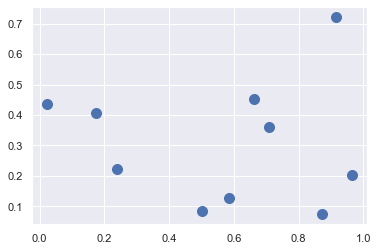

In [31]:
# 画出它的散点图
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

In [66]:
# 在坐标系中计算每对点的差值
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape # (10, 10, 2)
# 求出差值的平方
sq_differences = differences ** 2
sq_differences.shape # (10, 10, 2)
# 将差值求和获得平方距离
dist_sq = sq_differences.sum(-1)
dist_sq.shape # (10, 10)

nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 4 2 3 7 9 1 6 5 8]
 [1 9 3 4 0 2 7 5 6 8]
 [2 7 3 0 9 6 4 5 8 1]
 [3 9 2 4 0 7 1 6 5 8]
 [4 0 3 2 9 7 1 6 5 8]
 [5 8 6 7 9 2 3 0 1 4]
 [6 5 7 8 2 9 3 0 4 1]
 [7 2 6 3 0 9 5 4 8 1]
 [8 5 6 7 9 2 3 0 1 4]
 [9 3 2 1 4 7 0 6 5 8]]


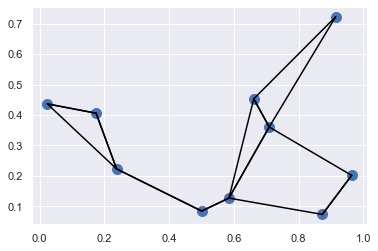

In [70]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')